#Research on the illeterate of each province in Indonesia uses the K Means measurement indicator

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#1. Preparation of Data1. Preparation of Data

#Import all of libraries that is required

In [ ]:
illiterate = pd.read_csv("/content/illiterate.csv")

##Read in the "illeterate" csv file as DataFrame called illeterate

#Check the head of illeterate

In [ ]:
illiterate.tail()

,Province,illiterate,Never Attended School,organized_learning_partisipated_preschool,gross_partisipated_preschool
30,MALUKU,0.55,1.17,97.54,30.30
31,MALUKU UTARA,1.10,1.66,95.84,38.03
32,PAPUA BARAT,2.31,4.79,92.79,25.00
33,PAPUA,17.64,27.99,60.32,12.71
34,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(illiterate.isnull().sum())

Province                                     1
illiterate                                   1
Never Attended School                        1
organized_learning_partisipated_preschool    1
gross_partisipated_preschool                 1
dtype: int64


In [ ]:
illiterate.drop(index=[34],inplace=True)

In [ ]:
illiterate.tail()

,Province,illiterate,Never Attended School,organized_learning_partisipated_preschool,gross_partisipated_preschool
29,SULAWESI BARAT,5.53,5.44,94.61,44.02
30,MALUKU,0.55,1.17,97.54,30.30
31,MALUKU UTARA,1.10,1.66,95.84,38.03
32,PAPUA BARAT,2.31,4.79,92.79,25.00
33,PAPUA,17.64,27.99,60.32,12.71


#Check possibility duplicate data "illeterate

In [ ]:
illiterate.duplicated().sum()

0

#Check illeterate info

In [ ]:
illiterate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Province                                   34 non-null     object 
 1   illiterate                                 34 non-null     float64
 2   Never Attended School                      34 non-null     float64
 3   organized_learning_partisipated_preschool  34 non-null     float64
 4   gross_partisipated_preschool               34 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


#Check the illeterate's shape

In [ ]:
illiterate.shape

(34, 5)

#Drop "Province" column that it is useless for regression calculation

In [ ]:
illiterate.drop(['Province'],axis=1,inplace=True)

#2. Explanatory Data Analysis

#Check the illeterate describe methods

In [ ]:
illiterate.describe()

,illiterate,Never Attended School,organized_learning_partisipated_preschool,gross_partisipated_preschool
count,34.000000,34.000000,34.000000,34.000000
mean,3.036471,3.405294,94.192647,33.289412
std,3.396448,4.585797,6.517615,9.903838
min,0.210000,0.360000,60.320000,12.710000
25%,0.980000,1.667500,94.875000,27.765000
50%,1.725000,2.200000,95.485000,31.030000
75%,4.425000,3.805000,96.572500,37.242500
max,17.640000,27.990000,99.160000,62.980000


In [ ]:
from sklearn import preprocessing

#Import cross validation MinMaxScaler from sklearn

In [ ]:
minmax = preprocessing.MinMaxScaler().fit_transform(illiterate)

In [ ]:
minmax

array([[0.07917384, 0.02931596, 0.95597322, 0.3600557 ],
       [0.03614458, 0.03764025, 0.92816684, 0.20529143],
       [0.02639128, 0.03474484, 0.91297631, 0.30634573],
       [0.03155479, 0.06044155, 0.90345005, 0.19614084],
       [0.08835341, 0.07926167, 0.91503605, 0.36880843],
       [0.05909352, 0.05211726, 0.90731205, 0.24607122],
       [0.10441767, 0.05718422, 0.88877446, 0.2782972 ],
       [0.13080895, 0.04994571, 0.92662204, 0.35806644],
       [0.0854848 , 0.05863192, 0.97863028, 0.38611498],
       [0.03786575, 0.04813608, 0.70108136, 0.31649095],
       [0.00573723, 0.01882012, 0.7407312 , 0.48816391],
       [0.06712565, 0.05247919, 0.90319258, 0.39128705],
       [0.29030407, 0.11292074, 0.94644696, 0.67177243],
       [0.24784854, 0.09192906, 1.        , 1.        ],
       [0.34079174, 0.15381831, 0.93975283, 0.78516014],
       [0.08433735, 0.0781759 , 0.89881565, 0.29719515],
       [0.22375215, 0.15526602, 0.95417096, 0.33558783],
       [0.55765921, 0.20919291,

#Arrange ideal range

In [ ]:
scr = []
for i in range (1,10):
  score = KMeans (n_clusters=i).fit(minmax).score(minmax)
  print(score)
  scr.append(score)

-4.37220486231584
-1.876966706415471
-0.9039560119588625
-0.7071464867327706
-0.560445620971129
-0.4409990333267312
-0.34904024445667325
-0.29173587273576235
-0.21641546623106345


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

#Set the ideal data cluster based on the beginning of the slope of the graph

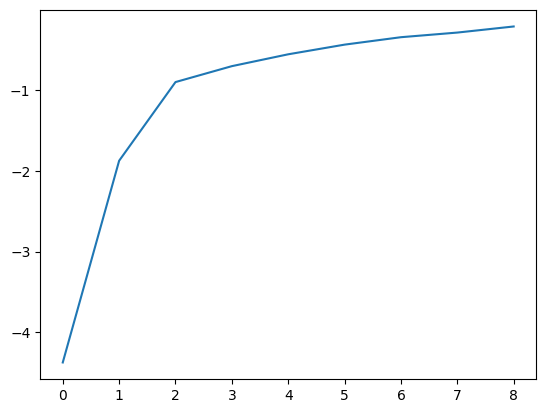

In [ ]:
plt.plot(scr)

#The ideal data cluster amount 2

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(minmax)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=123)

#Use pairplot to recreate the plot below

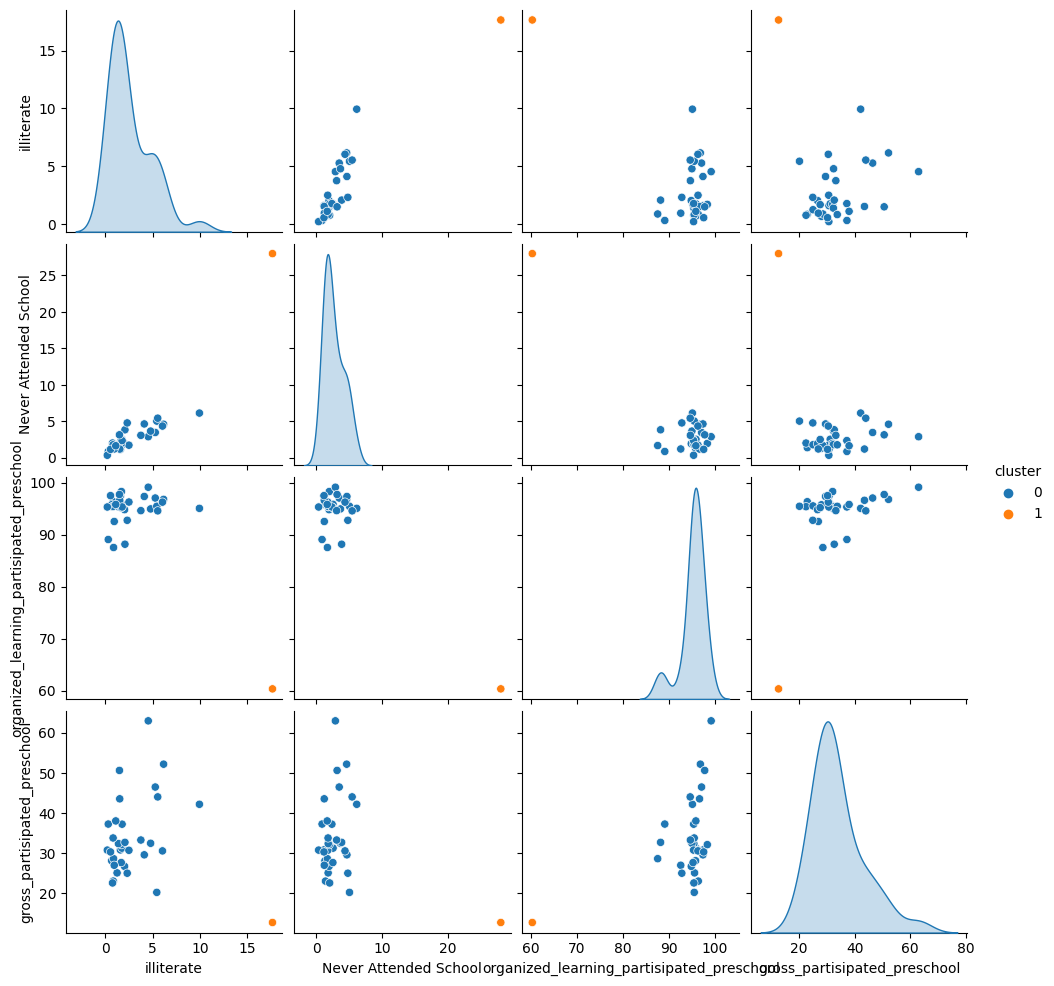

In [ ]:
sns.pairplot(illiterate,hue='cluster')

#Print result of KMeans Test

In [ ]:
print(kmeans.cluster_centers_)
illiterate["cluster"] = kmeans.labels_
illiterate.tail(33)

[[0.1367722  0.08325382 0.89853478 0.42178298]
 [1.         1.         0.         0.        ]]


,illiterate,Never Attended School,organized_learning_partisipated_preschool,gross_partisipated_preschool,cluster
1,0.84,1.40,96.37,23.03,0
2,0.67,1.32,95.78,28.11,0
3,0.76,2.03,95.41,22.57,0
4,1.75,2.55,95.86,31.25,0
5,1.24,1.80,95.56,25.08,0
6,2.03,1.94,94.84,26.70,0
7,2.49,1.74,96.31,30.71,0
8,1.70,1.98,98.33,32.12,0
9,0.87,1.69,87.55,28.62,0
10,0.31,0.88,89.09,37.25,0


from matplotlib import pyplot as plt
_df_0['illiterate'].plot(kind='hist', bins=20, title='illiterate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Never Attended School'].plot(kind='hist', bins=20, title='Never Attended School')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['organized_learning_partisipated_preschool'].plot(kind='hist', bins=20, title='organized_learning_partisipated_preschool')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['gross_partisipated_preschool'].plot(kind='hist', bins=20, title='gross_partisipated_preschool')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='illiterate', y='Never Attended School', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Never Attended School', y='organized_learning_partisipated_preschool', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='organized_learning_partisipated_preschool', y='gross_partisipated_preschool', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='gross_partisipated_preschool', y='cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster']
  ys = series['illiterate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster')
_ = plt.ylabel('illiterate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster']
  ys = series['Never Attended School']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster')
_ = plt.ylabel('Never Attended School')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster']
  ys = series['organized_learning_partisipated_preschool']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster')
_ = plt.ylabel('organized_learning_partisipated_preschool')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster']
  ys = series['gross_partisipated_preschool']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster')
_ = plt.ylabel('gross_partisipated_preschool')

from matplotlib import pyplot as plt
_df_12['illiterate'].plot(kind='line', figsize=(8, 4), title='illiterate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Never Attended School'].plot(kind='line', figsize=(8, 4), title='Never Attended School')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['organized_learning_partisipated_preschool'].plot(kind='line', figsize=(8, 4), title='organized_learning_partisipated_preschool')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['gross_partisipated_preschool'].plot(kind='line', figsize=(8, 4), title='gross_partisipated_preschool')
plt.gca().spines[['top', 'right']].set_visible(False)

#The graph shows total quantity each cluster

(array([33.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

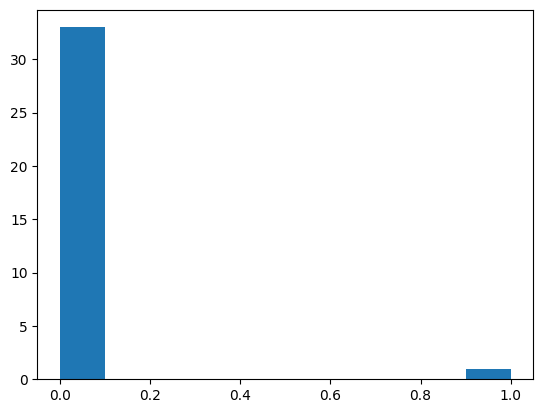

In [ ]:
plt.hist(illiterate['cluster'])

#The Graph shows centroids (red square)

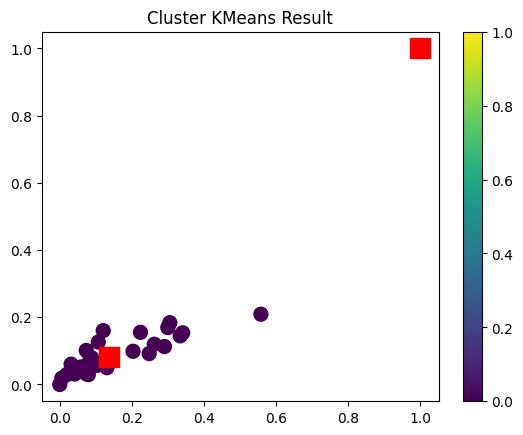

In [ ]:
output= plt.scatter(minmax[:,0], minmax[:,1], s=100, c=illiterate.cluster, marker= 'o', alpha=1,)
centers  =kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1, marker='s');
plt.title('Cluster KMeans Result')
plt.colorbar(output)
plt.show()

#3. Conclusion

#There are three category the productive areas of each province in Indonesia, high illeterate (value:1, and low illeterate (value:0)
